# Working with Time Series
Since python was  develeped in the context of financial modelling you might expect a set of tools to work with dates, time and time-indexed data.
Data can come in a few flavors which we will discuss here
 

Timestamps => refers to particular moments in time(July 4th 2015 at 7:00am)

Time intervals => refers to a length of time beyween a particular beginning and endpoint

Time deltas => Durations reference an exact length of time e.g a duration of 22.56 seconds

# Native Python dates and times: datetime and dateutil
python provides inbuilt module datetime
python also provides dateutil module which is a third party 

In [41]:
#creating a datetime python object
from datetime import datetime
datetime(year=2015, month=7, day=4)
#datetime.now()

datetime.datetime(2015, 7, 4, 0, 0)

In [42]:
from dateutil import parser
date = parser.parse("4th of July 2015")
date


datetime.datetime(2015, 7, 4, 0, 0)

In [43]:
#strftime = ""string format time"
#%A = foramt code for full weekday name
date.strftime('%A')


'Saturday'

# Numpy datetime and Pandas Timestamp
Python,s built-in datetime is powerful when working with large arrays
Numpy comes in with datetime64 encodes dates as 64-bit integers which means they are compact(use less memory) and vectorized(operations work on entire arrays, super fast)

In [44]:
import numpy as np

date = np.array('2015-07-04', dtype = np.datetime64)
print(date)

2015-07-04


# Time unit trade-off
Time unit trade off refers to the concept of exchanging a certain amount of time in one state for a different amount of time in another state

datetime64 uses 64 bits total,

You must choose a fundamental unit(years, days, seconds,nanoseconds)

The finer the unit(like nanoseconds), the smaller the total representable span

In [45]:
#Day Resolution
np.datetime64('2015-07-04')



np.datetime64('2015-07-04')

In [46]:
#Minute Resolution
np.datetime64('2015-07-04 12:00')

np.datetime64('2015-07-04T12:00')

In [47]:
#Second resolution
np.datetime64('2015-07-04 12:59:59.50', 'ns')

np.datetime64('2015-07-04T12:59:59.500000000')

# Dates and Times in Pandas

Pandas builds upon all the tools just discussed to provide a TimeStamp Object, which combines the ease of use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64.
Fom this we can construct a DateTimeIndex that can be used to index data in a series or dataframe

In [48]:
import pandas as pd

date = pd.to_datetime("4th of July, 2015")
print(date.strftime('%A'))

print(date + pd.to_timedelta(np.arange(5), 'D'))


Saturday
DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)


# Indexing data by Time

Pandas even becomes more powerful when you index your data by time instead of just numbers

In [49]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])

data = pd.Series([0,1,2,3], index=index)
print(data)

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64


In [50]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [51]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

# Pandas Time Series Data Structures

# Core Pandas Time Structures

For timestamps, pandas provides:

TimeStamp => A single time point(like Python,s datetime but faster) which is essentially replacement of pythons datetime


DateTimeIndex => An index of timestamps


For TimePeriods, pandas provides the Period type.This encodes a fixed-frequency interval based on numpy.datetime64

Period => A span of time(e.g month, quarter)



For Timedelta type.Timedelta is a more efficient replacement for python,s native datetime.timedelta type, and is based on numpy.timedelta64. This associated index structure is TimedeltaIndex

TimeDelta => a duration(difference between times)

In [52]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [53]:
#Any DateTimeIndex can be converted to a PeriodIndex with to_period()
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [54]:
#A TimedeltaIndex is created when a date is subtracted from another
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

# Regular Sequences

To make the creation of regular date sequences more convenient. Pandas offers a few functions for this purpose

Regular sequences in Pandas => p.date.range()

This works like range() in python but for times and dates
You can specify the start and end, OR
A start and number of periods, OR
A start, end and a frequency(freq)



In [55]:
pd.date_range('2015-07-03', '2015--7-10')



DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [56]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [57]:
pd.date_range('2015-07-03', periods=8, freq='H')

C:\Users\HP ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_2660\3521404607.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

# Regular Sequences of Periods
Period represents time spans(like months, quarters, years)

It is useful for data that isn,t about exact timestamps but about intervals.

we use th pd.period_range()

In [58]:
pd.period_range('2015-07-03', '2015-7-03')

PeriodIndex(['2015-07-03'], dtype='period[D]')

In [59]:
pd.date_range('2015-07-03', periods =8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [60]:
pd.date_range('2015-07-03', periods=8, freq='H')

C:\Users\HP ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_2660\3521404607.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

# Regular Sequences of durations
This works with time differences(like 1 hour, 2 days)

Great for experiments, shifts, or logs

In [61]:
pd.timedelta_range(0, periods=10, freq = 'H')

C:\Users\HP ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_2660\327657575.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=10, freq = 'H')


TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='h')

We have other calendar-based frequencies

'D' => Calendar Day

'B' => Bussiness Day

'W' => Weekly

'M' => Month End

'MS' => Month Start

'Q' => Quarter End

'QS' => Quarter Start

'Y' or 'A' => Year End

'YS' OR 'AS'=> Year Start


# Time Based Frequencies

'H' → Hourly

'T' or 'min' → Minute

'S' → Second

'L' → Millisecond

'U' → Microsecond

'N' → Nanosecond



In [62]:
#Every monday for 6 weeks
pd.date_range('2025-01-01', periods =6, freq = 'W-MON')





DatetimeIndex(['2025-01-06', '2025-01-13', '2025-01-20', '2025-01-27',
               '2025-02-03', '2025-02-10'],
              dtype='datetime64[ns]', freq='W-MON')

In [63]:
#Quarterly starts
pd.date_range('2025-01-01', periods =4, freq='QS')

DatetimeIndex(['2025-01-01', '2025-04-01', '2025-07-01', '2025-10-01'], dtype='datetime64[ns]', freq='QS-JAN')

In [64]:
#Every 30 minutes
pd.date_range('2025-01-01', periods =6, freq ='30T')

C:\Users\HP ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_2660\1732896066.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.date_range('2025-01-01', periods =6, freq ='30T')


DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 00:30:00',
               '2025-01-01 01:00:00', '2025-01-01 01:30:00',
               '2025-01-01 02:00:00', '2025-01-01 02:30:00'],
              dtype='datetime64[ns]', freq='30min')

# Frequencies and Offsets

Frequencies and Offsets in Pandas are tools used to define regular intervals of time. They are especially important when working with time series data(data indexed or organized by time)

They are used for 
To generate range of dates(e.g daily, weekly, hourly)

To resample data(e.g convert daily stock date to monthly averages)

To shift or offset time values( e.g, move all timestamps forward by 1 business day)

# Offsets

An offset is a python object that represents a specific time step

Offsets live in pandas.tseries.offsets

They give you finer control compared to string codes


Simply Frequency and Offsets in Pandas are used to define, manipulate and step through time intervals when working with time series data.

In [65]:
from pandas.tseries.offsets import BDay
pd.date_range("2025-01-01", periods=5, freq=BDay())

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-06',
               '2025-01-07'],
              dtype='datetime64[ns]', freq='B')

# Resampling and Converting Frequencies in Pandas

When working with time series dat, we often need to adjust the frequency of our data. Sometimes we want to summarize th data into a lower frequency( e.g daily, monthly) and other times we just want to align the data to a new frequency without changing its values.

Pandas comes in and provides two powerful tools 

resample() => used for aggregation(summarizing data, like averages or totals) Example: get the average stock price per month

asfreq() => used for selection(keeping exact values at specific times)
Example: pick the stock price at the last day of ecah month

In [67]:
dates = pd.date_range("2025-01-01", periods=10, freq="D")
prices = [100, 102, 105, 103,107, 108, 110, 112, 115, 117]
data = pd.Series(prices, index=dates)
print(data)

2025-01-01    100
2025-01-02    102
2025-01-03    105
2025-01-04    103
2025-01-05    107
2025-01-06    108
2025-01-07    110
2025-01-08    112
2025-01-09    115
2025-01-10    117
Freq: D, dtype: int64


In [ ]:
#using resample()
weekly_average = data.resample("W").mean()
print(weekly_average)

2025-01-05    103.4
2025-01-12    112.4
Freq: W-SUN, dtype: float64


In [ ]:
#using afreq() to extract values at weekly frequency
weekly_exact = data.asfreq("W-FRI")

print(weekly_exact)



2025-01-03    105
2025-01-10    117
Freq: W-FRI, dtype: int64


In [74]:
#Here the asfreq looks at the exact date. If no value exists on that date, you get NaN

#If it gets NaN, you can specify with method = 'ffill'(forward fill) or method='bffill'(backward fill)

weekly_ffill = data.asfreq("W-MON", method = 'ffill')
print(weekly_ffill)

2025-01-06    108
Freq: W-MON, dtype: int64


# TIME SHIFTS

In time series analysis, sometimes you just dont want today,s values, you want to compare with past or future values

For example

What was the price of stock today compared to 30 days ago?

What is the 1-year return on investment(ROI)

For this, time shifting is very useful.

shift() => shifts the data values up or down, the index stays the same, new empty spots get NaN

tshift() => shifts the index(dates) forward or backward and the data value stays where they are.


In [75]:
dates = pd.date_range("2025-01-01", periods=5, freq="D")
goog = pd.Series([100, 102, 104, 107, 110], index=dates)
print(goog)

2025-01-01    100
2025-01-02    102
2025-01-03    104
2025-01-04    107
2025-01-05    110
Freq: D, dtype: int64


In [76]:
goog.shift(2)

2025-01-01      NaN
2025-01-02      NaN
2025-01-03    100.0
2025-01-04    102.0
2025-01-05    104.0
Freq: D, dtype: float64

In [78]:
goog.tshift(2)

AttributeError: 'Series' object has no attribute 'tshift'

# Rolling Windows

A rolling window is a way to compute statistics(mean, sum, std) over a sliding subset of datapoints.

A rolling windows lets you zoom into smaller segements of your time series and compute useful statistics to smooth analyze, or detect patterns over time.

This can be accomplished via the rolling() attribute of Series and DataFrame objects, which returns a view similar to what we saw with the groupby operation.


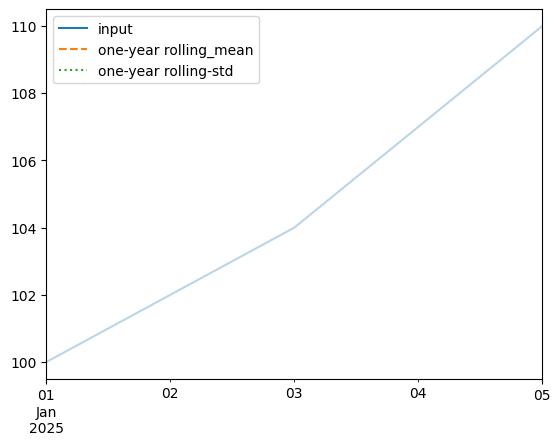

In [79]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': 
                     rolling.mean(),
                     'one-year rolling-std':
                     rolling.std()})
ax = data.plot(style= ['-', '--', ':'])
ax.lines[0].set_alpha(0.3)